# Knapsack Problem Optimization
 
- You are given a set of items, each with a weight and a value, and a knapsack with a maximum weight capacity. The goal is to determine the combination of items to include in the knapsack to maximize the total value without exceeding the weight capacity. 

- Use simulated annealing, genetic algorithm, or other optimization method to find an approximate solution.

Example:
Imagine you have 4 items with weights 4, 3, 9, and 11kg respectively. These same items have a value of 33, 24, 100, and 93 units respectively. We can represent the `weights` and `values` with two arrays
```
weights = [4, 3, 9, 11]
values = [33, 24, 100, 93]

```
We can add items 0 and 3 to the knapsack. `knapsack = [0, 3]`. The weight of the knapsack is then `knapsack_weight = weights[0] + weigths[3] = 15` and the total value of the knapsack is `knapsack_value = values[0] + values[3] = 126`.

## Problem 
 - knapsack problem , an optimization problem aiming to maximize the total value of items in a knapsack without excedding a specific weight capacity.
 - The Knapsack problem involves a set of items, each with a weight and a value. A Knapsack with a maxim weight capacity.
 - We will determine the combination of items to include in the knapsack in order to maximize the total value without exceeding the weight capacity

 ## Objective
   - Predict whether an item should be included in the knapsack to maximize value using a Genetic Algorithm

 ## Variable Being Predicted
 - Binary decision 0 or 1 for each of the items. 

 ## Exploratory Data Analysis

 - The data consists of some random generated values and weights for each of the items.


## **Implement The Solution Representation**

In [187]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Values [18, 73, 98, 9, 33, 16, 64, 98, 58, 61, 84, 49, 27, 13, 63, 4, 50, 56, 78, 98, 99, 1, 90, 58, 35, 93, 30, 76, 14, 41, 4, 3, 4, 84, 70, 2, 49, 88, 28, 55, 93, 4, 68, 29, 98, 57, 64, 71, 30, 45, 30, 87, 29, 98, 59, 38, 3, 54, 72, 83, 13, 24, 81, 93, 38, 16, 96, 43, 93, 92, 65, 55, 65, 86, 25, 39, 37, 76, 64, 65, 51, 76, 5, 62, 32, 96, 52, 54, 86, 23, 47, 71, 90, 100, 87, 95, 48, 12, 57, 85, 66, 14, 100, 21, 67, 51, 48, 63, 94, 4, 61, 6, 40, 91, 79, 76, 75, 51, 83, 22, 22, 65, 30, 2, 99, 26, 70, 71, 30, 52, 66, 45, 74, 46, 59, 35, 85, 71, 78, 94, 1, 50, 95, 66, 17, 67, 100, 72, 27, 55, 8, 62, 47, 73, 71, 26, 65, 53, 63, 46, 54, 45, 1, 69, 70, 80, 79, 43, 59, 77, 4, 30, 82, 23, 71, 75, 24, 12, 71, 33, 5, 87, 10, 11, 3, 58, 2, 97, 97, 36, 32, 35, 15, 80, 24, 45, 38, 9, 22, 21, 33, 68, 22, 85, 35, 83, 92, 38, 59, 90, 42, 64, 61, 15, 4, 40, 50, 44, 54, 25, 34, 14, 33, 94, 66, 27, 78, 56, 3, 29, 3, 51, 19, 5, 93, 21, 58, 91, 65, 87, 55, 70, 29, 81, 89, 67, 58, 29, 68, 84, 4, 51, 87, 74,

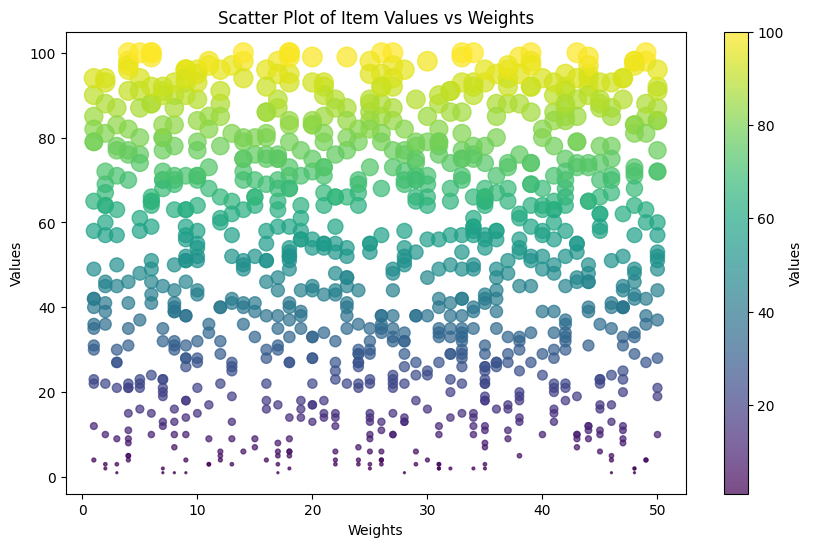

In [188]:
## Problem setup
num_items = 1000
max_value = 100
max_weight = 50
# Sets up the random generation of values and weights for the items , 
random.seed(1) # ensures that  the results are reproducible.

values = [random.randint(1, max_value) for _ in range(num_items)]
weights = [random.randint(1, max_weight) for _ in range(num_items)]

# Let's print the values
print("Values", values)

# Let's print the weights
print("Weights", weights)

max_knapsack_capacity = 500 ## Max knapsack capacity, should not exceed for the solution to be accepted 

plt.figure(figsize=(10, 6))
scatter = plt.scatter(weights, values, c=values, cmap='viridis', s=np.array(values)*2, alpha=0.7)
plt.colorbar(scatter, label='Values')
plt.title('Scatter Plot of Item Values vs Weights')
plt.xlabel('Weights')
plt.ylabel('Values')
plt.show()





   - We will represent each solution (individual) as a binary string (list), where each bit indicates whether an item is included in the knapscak (1) or not(0).

 ## **Implementing the Genetic Algorithms (GA)** 
 


## Initialize Parameters and Population
 - It will generate a new population of binary strings, where each string represents a possible solution.
 - Ensures that the initial population consist of only feasible solutions that won't exceed the capacity.


In [189]:
def generate_population(size):
    return [np.random.randint(2, size=num_items) for _ in range(size)] ## the size of the population is controlled by the size parameter

# Genetic algorithm parameters , defined settings for the GA algorithm.
population_size = 200
generations = 300
mutation_rate = 0.001
tournament_size = 5


## Fitness function
- It will calculate the total value of items in the knapscak but just if the total weight doesn't exceed the knapscak's capacity.
- If it does exceed the knapscak's capacity we will penalize the fitness to **0** or discard the applied solution.

In [190]:
def fitness(individual):
    total_value = sum(individual[i] * values[i] for i in range(num_items))  # Calculate the total value of items in the knapsack
    total_weight = sum(individual[i] * weights[i] for i in range(num_items))  # Calculate the total weight of items in the knapsack
    if total_weight > max_knapsack_capacity:
        return 0
    return total_value

## Selection, Crossover and Mutation
 - Selection : it will be use roulette wheel selection or tournament selection 
 - Crossover : Single-point crossover will be used.
 - Mutation : flipping random bits in the string will be used.

- **Selection**: Selects the best individuals from a random sample for the next generation.

In [191]:
# Selection (Tournament selection)
def tournament_selection(population, scores):
    selected = []
    for _ in range(population_size):
        tournament = random.sample(list(zip(population, scores)), tournament_size)
        selected.append(max(tournament, key=lambda x: [1])[0])
    return selected

- **Crossover**: Swaps the segments of the two paretns to create offspring.

In [192]:
# Single-point cross)
def crossover(parent1, parent2):
    point = random.randint(1, num_items -1)
    return np.concatenate((parent1[:point], parent2[point:]))

- **Mutational**: Flips bits in the individual's binary string with probability defined by the mutation_rate parameter

In [193]:
# Mutation 
def mutate(individual):
    for i in range(num_items):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i] # flipts bits

- **Genetic Algorithm**
 
  - Implements the work that initializes the population, calculate the fitness, selects the best individuals and applies crossover and mutation to generate new populations over several.generations 

In [195]:
# GA main loop


def genetic_algorithm():
    population = generate_population(population_size)
    best_solution = None
    best_fitness = 0
    
    for generation in range(generations):
        scores = [fitness(ind) for ind in population]
        best_in_population = max(scores)
        
        if best_in_population > best_fitness:
            best_fitness = best_in_population
            best_solution = population[scores.index(best_fitness)]
        
        print(f'Generation {generation}, Best Fitness: {best_fitness}')
        
        selected_population = tournament_selection(population, scores)
        next_population = []
        
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i + 1]
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            mutate(child1)
            mutate(child2)
            next_population.append(child1)
            next_population.append(child2)
        
        population = next_population
    
    return best_solution, best_fitness

# Run the Genetic Algorithm
best_solution, best_fitness = genetic_algorithm()
print(f'Best Solution Found: {best_solution}')
print(f'Best Fitness (Total Value): {best_fitness}')

# Calculate the number of items selected and their indices
num_items_selected = sum(best_solution)
selected_items = np.where(best_solution == 1)[0].tolist()

# Print the final output in the required format
print(f'Maximum value: {best_fitness}')
print(f'Number of items selected: {num_items_selected}')
print(f'Selected items: {selected_items}')

Generation 0, Best Fitness: 21694.0
Generation 1, Best Fitness: 21694.0
Generation 2, Best Fitness: 21694.0
Generation 3, Best Fitness: 21694.0
Generation 4, Best Fitness: 21694.0
Generation 5, Best Fitness: 21694.0
Generation 6, Best Fitness: 21704.5
Generation 7, Best Fitness: 21704.5
Generation 8, Best Fitness: 21704.5
Generation 9, Best Fitness: 21704.5
Generation 10, Best Fitness: 21704.5
Generation 11, Best Fitness: 21917.0
Generation 12, Best Fitness: 21917.0
Generation 13, Best Fitness: 21917.0
Generation 14, Best Fitness: 21917.0
Generation 15, Best Fitness: 21917.0
Generation 16, Best Fitness: 21917.0
Generation 17, Best Fitness: 21917.0
Generation 18, Best Fitness: 21917.0
Generation 19, Best Fitness: 21917.0
Generation 20, Best Fitness: 21917.0
Generation 21, Best Fitness: 21917.0
Generation 22, Best Fitness: 21917.0
Generation 23, Best Fitness: 21917.0
Generation 24, Best Fitness: 21917.0
Generation 25, Best Fitness: 21917.0
Generation 26, Best Fitness: 21917.0
Generation 

# Plot the results

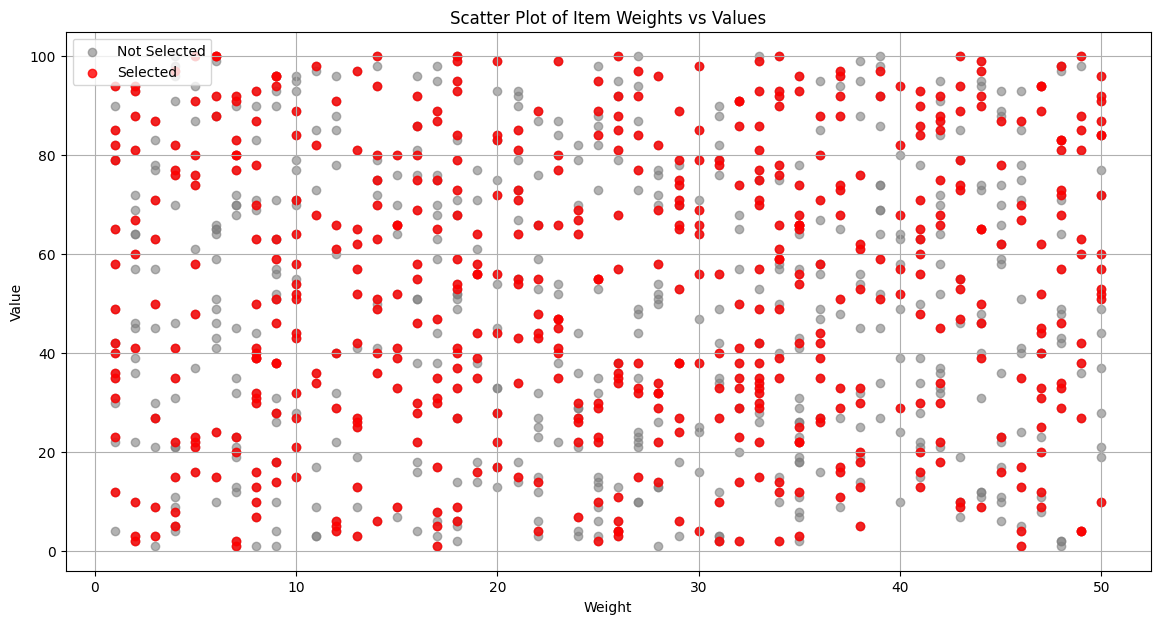

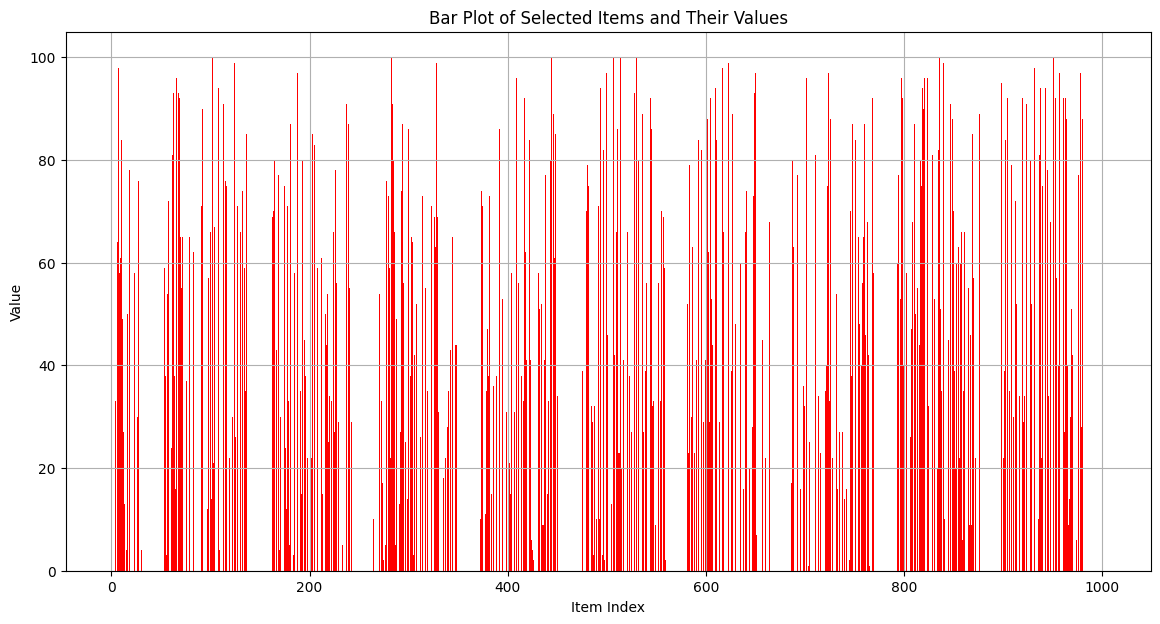

In [197]:

# Identify the selected items

selected_items = np.where(best_solution ==1)[0]

# Scatter plot of item weights vs. values

plt.figure(figsize=(14, 7))
plt.scatter(weights, values, c='gray', label='Not Selected', alpha=0.6)
plt.scatter(np.array(weights)[selected_items], np.array(values)[selected_items], c='red', label='Selected', alpha=0.8)
plt.title('Scatter Plot of Item Weights vs Values')
plt.xlabel('Weight')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# plot of selected items 
plt.figure(figsize=(14, 7))
plt.bar(selected_items, np.array(values)[selected_items], color='red')
plt.bar(selected_items, np.array(values)[selected_items], color='red')
plt.title('Bar Plot of Selected Items and Their Values')
plt.xlabel('Item Index')
plt.xlabel('Item Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


 - best_fitness represents the maximum total value of the items in the knapsack while staying  with the capacity limit.
 - num_items_Selected is calculated by summing up the best_solution, which is a binary array where **1** indicates the item is slected, therefore the sum gives the count of selected items.
 - selected_items is a list of items where the value in *best_solution** is **1** , indicating which items are included in the knapsack for the optimal solution